In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#conda install -c conda-forge scikit-plot

In [41]:
#!pip install investpy
#!pip install pykrx
#!pip install seaborn
#!pip install workalendar
#!pip install --upgrade finance-datareader

In [161]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [162]:
# 크롤링 start_date, end_date
start_date='2018-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2021-01-13'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')
# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [163]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [164]:
# 삼성전자우 차트 데이터
df1 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005935")
df1 = df1.drop(['시가','고가','저가','거래량'],axis=1)
df1.columns = ['Close']
model_samsung['SAMSUNGWO'] = df1

# 디스플레이 - 삼성SDI
df2 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "006400")
df2 = df2.drop(['시가','고가','저가','거래량'],axis=1)
df2.columns = ['Close']
model_samsung['SDI'] = df2

# 자동차 - 현대차
df4 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005380")
df4 = df4.drop(['시가','고가','저가','거래량'],axis=1)
df4.columns = ['Close']
model_samsung['HYUNCAR'] = df4

# 증권 미래에셋대우
df6 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "006800")
df6 = df6.drop(['시가','고가','저가','거래량'],axis=1)
df6.columns = ['Close']
model_samsung['MIRAE'] = df6

# 은행 KB금융
df8 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "105560")
df8 = df8.drop(['시가','고가','저가','거래량'],axis=1)
df8.columns = ['Close']
model_samsung['KBBANK'] = df8

# 인터넷 네이버
df9 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "035420")
df9 = df9.drop(['시가','고가','저가','거래량'],axis=1)
df9.columns = ['Close']
model_samsung['NAVER'] = df9

# 삼성전기
df17 = stock.get_market_ohlcv_by_date(start_date__, end_date__, "009150")
df17 = df17.drop(['시가','고가','저가','거래량'],axis=1)
df17.columns = ['Close']
model_samsung['S_ELEC'] = df17

In [165]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['MSCI_KR'] = MSCI_KR
#model_samsung['SOXX'] = SOXX
#model_samsung['SMH'] = SMH
#model_samsung['SOXL'] = SOXL
#model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['hang_seng'] = hang_seng_

In [166]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [167]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close      macd  macdsignal9  macdhist  SAMSUNGWO       SDI  \
2018-02-20  0.185808  0.335367     0.295544  0.577649   0.196835  0.016522   
2018-02-21  0.183567  0.337149     0.299280  0.573030   0.189318  0.013913   
2018-02-22  0.173856  0.334766     0.301666  0.556223   0.179031  0.015652   
2018-02-23  0.182446  0.337966     0.304384  0.560355   0.179031  0.020870   
2018-02-26  0.185434  0.342804     0.307782  0.568817   0.181405  0.012174   

             HYUNCAR     MIRAE    KBBANK     NAVER    S_ELEC        US  \
2018-02-20  0.434524  0.876901  1.000000  0.237114  0.104244  0.091580   
2018-02-21  0.466766  0.884142  0.970480  0.259514  0.106089  0.096671   
2018-02-22  0.451885  0.845040  0.955720  0.254344  0.104244  0.118224   
2018-02-23  0.461806  0.863867  0.950800  0.256069  0.115314  0.101165   
2018-02-26  0.471726  0.853729  0.936039  0.239699  0.099631  0.072136   

              SNP500   MSCI_KR  TREASURY_5Y  hang_seng  
2018-02-20  0.301686  0.38803

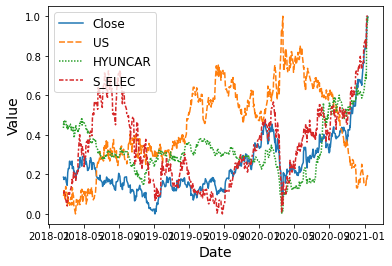

In [168]:
##삼성주가와 건설대장주, 자동차 대장주 비교
# 현대자동차와 살짝 비슷한 경향
ax = sns.lineplot(data=output[['Close', 'US', 'HYUNCAR', 'S_ELEC']])

#plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

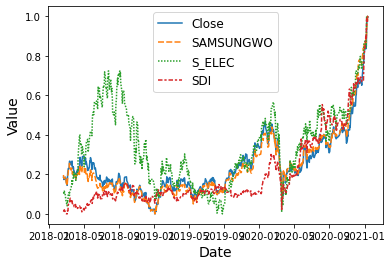

In [169]:
##삼성주가와 건설대장주, 자동차 대장주 비교
# 현대자동차와 살짝 비슷한 경향
ax = sns.lineplot(data=output[['Close', 'SAMSUNGWO', 'S_ELEC', 'SDI']])

#plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

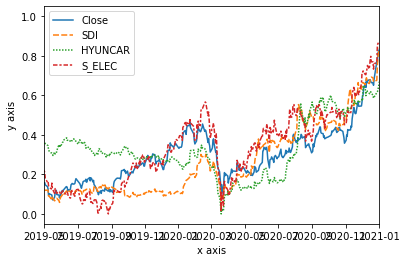

In [170]:
ax = sns.lineplot(data=output[['Close', 'SDI', 'HYUNCAR', 'S_ELEC']])

plt.xlim('2019-05-01','2021-01-01')
#plt.ylim(5,20)
#plt.plot(x,y)
plt.xlabel('x axis')
plt.ylabel('y axis')
#plt.title('matplotlib sample')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


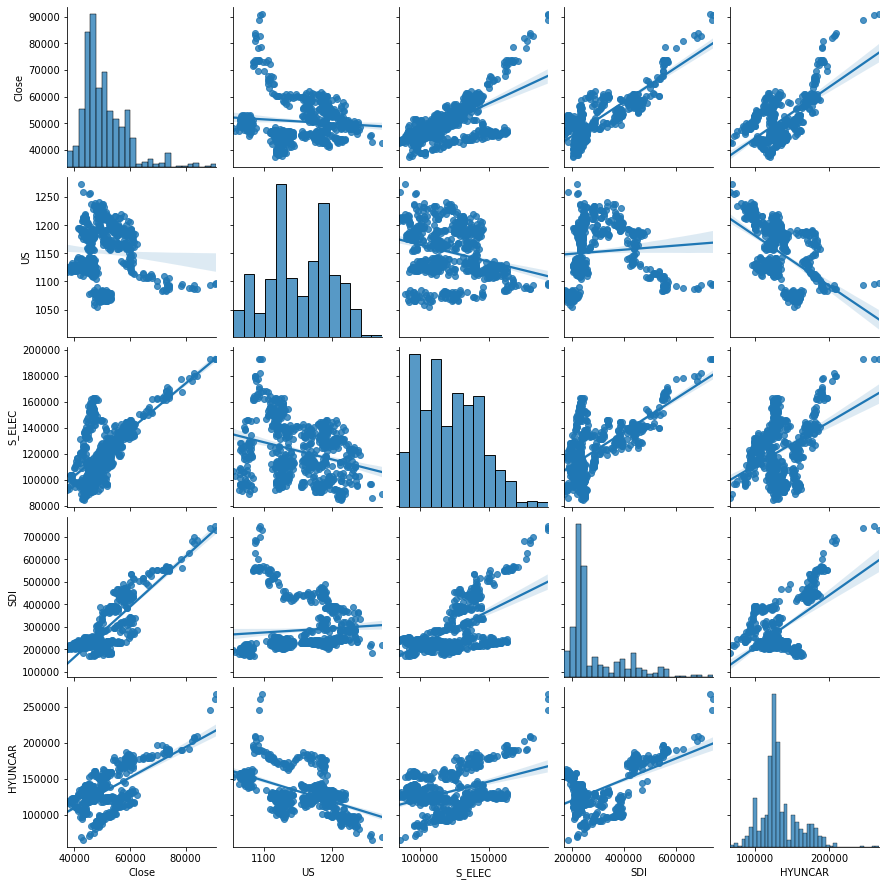

In [171]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung[['Close','US', 'S_ELEC', 'SDI', 'HYUNCAR']], kind='reg')

In [172]:
model_samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 2018-02-20 to 2021-01-12
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        662 non-null    int32  
 1   macd         662 non-null    float64
 2   macdsignal9  662 non-null    float64
 3   macdhist     662 non-null    float64
 4   SAMSUNGWO    662 non-null    int32  
 5   SDI          662 non-null    int32  
 6   HYUNCAR      662 non-null    int32  
 7   MIRAE        662 non-null    int32  
 8   KBBANK       662 non-null    int32  
 9   NAVER        662 non-null    int32  
 10  S_ELEC       662 non-null    int32  
 11  US           662 non-null    float64
 12  SNP500       662 non-null    float64
 13  MSCI_KR      662 non-null    int64  
 14  TREASURY_5Y  662 non-null    float64
 15  hang_seng    662 non-null    float64
dtypes: float64(7), int32(8), int64(1)
memory usage: 67.2 KB


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\statsmodels\tsa\stattools.py:1573: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


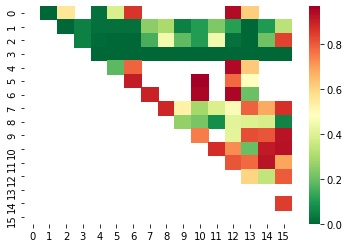

[('Close', 'macd'), ('Close', 'SAMSUNGWO'), ('macd', 'macdsignal9'), ('macd', 'SAMSUNGWO'), ('macd', 'SDI'), ('macd', 'HYUNCAR'), ('macd', 'MSCI_KR'), ('macdsignal9', 'SAMSUNGWO'), ('macdsignal9', 'SDI'), ('macdsignal9', 'HYUNCAR'), ('macdsignal9', 'SNP500'), ('macdsignal9', 'MSCI_KR'), ('macdhist', 'SAMSUNGWO'), ('macdhist', 'SDI'), ('macdhist', 'HYUNCAR'), ('macdhist', 'MIRAE'), ('macdhist', 'KBBANK'), ('macdhist', 'NAVER'), ('macdhist', 'S_ELEC'), ('macdhist', 'US'), ('macdhist', 'SNP500'), ('macdhist', 'MSCI_KR'), ('macdhist', 'TREASURY_5Y'), ('macdhist', 'hang_seng')]


In [173]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs



# Heatmap to show the p-values of the cointegration test
# between each pair of stocks
scores, pvalues, pairs = find_cointegrated_pairs(model_samsung)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, cmap='RdYlGn_r', mask = (pvalues >= 0.98))
plt.show()
print(pairs)

In [174]:
#model_samsung.drop(['hang_seng','macdsignal9', 'MSCI_KR','TREASURY_5Y','KBBANK','ORION','NEPASS','TESNA','DBHIGH'],axis=1,inplace=True)
model_samsung.drop(['hang_seng','TREASURY_5Y','MSCI_KR','KBBANK','macd','macdsignal9','SNP500','macd', 'MIRAE','macdhist'],axis=1,inplace=True)

In [175]:
#model_samsung.drop(['hang_seng','macdsignal9', 'MSCI_KR','TREASURY_5Y','KBBANK','ORION','NEPASS','TESNA','DBHIGH'],axis=1,inplace=True)
model_samsung.drop(['NAVER'],axis=1,inplace=True)

<AxesSubplot:>

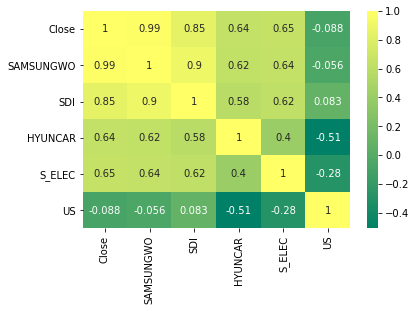

In [176]:
# 삼성주가와 관련된 heatmap 구성
## Insight  : 삼성주가와의 관계 0.5 이상(비슷한 추세) 그리고 -0.5 대상(반대 추세) 대상으로 추출한게 확연히 확인 할 수 있음
##            macdhist 의 경우 macd 와 상관관계를 위한 지표이기 떄문에 예외적으로 포함한다
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

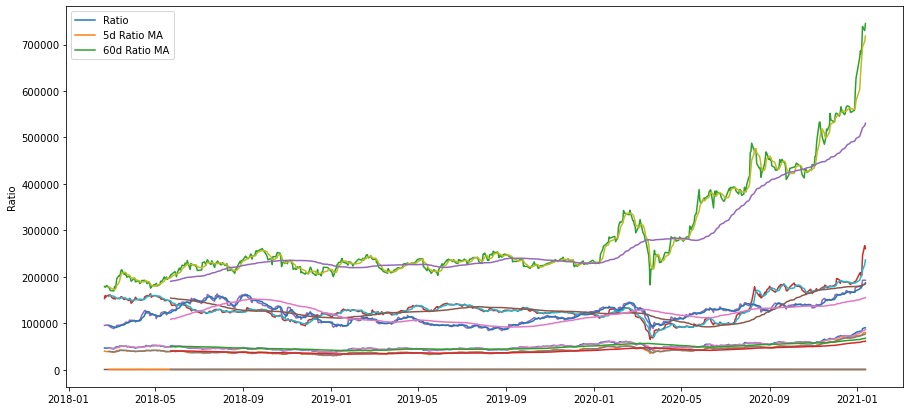

In [177]:
ratios_mavg5 = model_samsung.rolling(window=5,
                               center=False).mean()
ratios_mavg60 = model_samsung.rolling(window=60,
                               center=False).mean()
std_60 = model_samsung.rolling(window=60,
                        center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(model_samsung.index, model_samsung.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

<Figure size 1080x504 with 0 Axes>

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


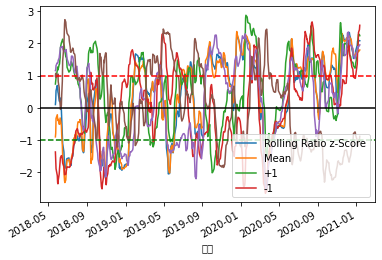

In [178]:
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

In [180]:
model_samsung

,Close,SAMSUNGWO,SDI,HYUNCAR,S_ELEC,US
날짜,,,,,,
2018-02-20,47400,40400,179500,153500,95900,1074.91
2018-02-21,47280,40020,178000,160000,96100,1076.02
2018-02-22,46760,39500,179000,157000,95900,1080.72
2018-02-23,47220,39500,182000,159000,97100,1077.00
2018-02-26,47380,39620,177000,161000,95400,1070.67
...,...,...,...,...,...,...
2021-01-06,82200,74300,680000,203000,176000,1087.93
2021-01-07,82900,74300,698000,206000,182000,1094.28
2021-01-08,88800,77800,739000,246000,193000,1092.93


In [182]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close  SAMSUNGWO       SDI   HYUNCAR    S_ELEC        US
2018-02-20  0.185808   0.196835  0.016522  0.434524  0.104244  0.091580
2018-02-21  0.183567   0.189318  0.013913  0.466766  0.106089  0.096671
2018-02-22  0.173856   0.179031  0.015652  0.451885  0.104244  0.118224
2018-02-23  0.182446   0.179031  0.020870  0.461806  0.115314  0.101165
2018-02-26  0.185434   0.181405  0.012174  0.471726  0.099631  0.072136


In [183]:
Y = output['Close']
X = output.drop(['Close'], axis=1).shift(-2).fillna(output.mean())

In [184]:
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [185]:
X_train

,SAMSUNGWO,SDI,HYUNCAR,S_ELEC,US
2019-07-09,0.159248,0.106087,0.362599,0.055351,0.551316
2019-03-08,0.099901,0.079130,0.295635,0.155904,0.337063
2020-12-15,0.760633,0.690435,0.618056,0.797048,0.174585
2019-11-15,0.249258,0.126087,0.293155,0.248155,0.520086
2020-04-20,0.247280,0.200870,0.132440,0.252768,0.821379
...,...,...,...,...,...
2018-03-06,0.198813,0.020870,0.439484,0.071956,0.087912
2019-09-20,0.202770,0.119130,0.337798,0.165129,0.644731
2018-12-21,0.025717,0.085217,0.260913,0.174354,0.284830
2020-11-19,0.604352,0.619130,0.561012,0.621771,0.268596


In [190]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    model_name = model.__class__.__name__
    print('###',model_name,'###')
    rmsle(y_test, pred)
    print('\n{0} 학습데이터셋 정확도: {1:.4f}'.format(model_name, model.score(X_train, y_train)))

In [192]:
# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
#lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]
for model in model_list:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.0438

LinearRegression 학습데이터셋 정확도: 0.9095
### RandomForestRegressor ###
RMSLE: 0.0231

RandomForestRegressor 학습데이터셋 정확도: 0.9911
### GradientBoostingRegressor ###
RMSLE: 0.0224

GradientBoostingRegressor 학습데이터셋 정확도: 0.9988
### XGBRegressor ###
RMSLE: 0.0216

XGBRegressor 학습데이터셋 정확도: 0.9999
### LGBMRegressor ###
RMSLE: 0.0268

LGBMRegressor 학습데이터셋 정확도: 0.9920


In [194]:
model = XGBRegressor(n_estimators=500)
model.fit(X_train, y_train)
# Make a prediction
predict_prices = model.predict(X_test)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

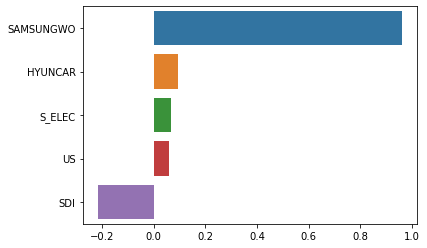

In [195]:
import seaborn as sns
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

plotFeatureList(lr_model, X_train)

In [196]:
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test['predict_prices'] = '0'
for i in range(0,len(predict_prices)):
    df_y_test['predict_prices'][i] = predict_prices[i]

<ipython-input-196-e4b45437e36e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_test['predict_prices'][i] = predict_prices[i]


In [197]:
df_y_test = df_y_test.sort_index()

df_y_test =df_y_test.apply(pd.to_numeric)

In [198]:
df_y_test

,Close,predict_prices
2018-02-21,0.183567,0.182200
2018-02-28,0.179458,0.174145
2018-03-05,0.144725,0.190318
2018-03-07,0.208590,0.218951
2018-03-09,0.229505,0.230045
...,...,...
2020-12-30,0.813259,0.844593
2021-01-05,0.867414,0.847279
2021-01-06,0.835668,0.847570
2021-01-08,0.958917,0.847279


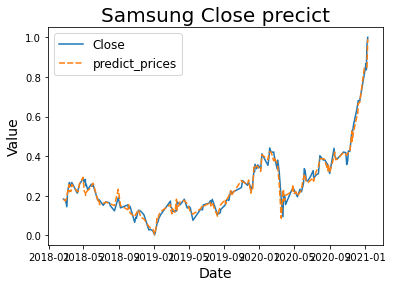

In [199]:
ax = sns.lineplot(data=df_y_test[['Close','predict_prices']])

plt.title('Samsung Close precict', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()